# Purpose: demonstrate generating random Bayesian belief networks

Let's generate some random Bayesian belief networks (BBNs) and perform inference.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from pybbn.generator.bbngenerator import generate_singly_bbn, generate_multi_bbn, convert_for_exact_inference
from pybbn.generator.bbngenerator import convert_for_drawing
from pybbn.pptc.inferencecontroller import InferenceController

np.random.seed(37)

g, p = generate_multi_bbn(5, max_iter=5)
m_bbn = convert_for_exact_inference(g, p)
nx_multi_bbn = convert_for_drawing(m_bbn)

g, p = generate_singly_bbn(5, max_iter=10)
s_bbn = convert_for_exact_inference(g, p)
nx_singly_bbn = convert_for_drawing(s_bbn)

Here, we visualize the generated multi- and singly-connected BBNs.

/home/super/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/super/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


Text(0.5, 1.0, 'Singly-connected BBN')

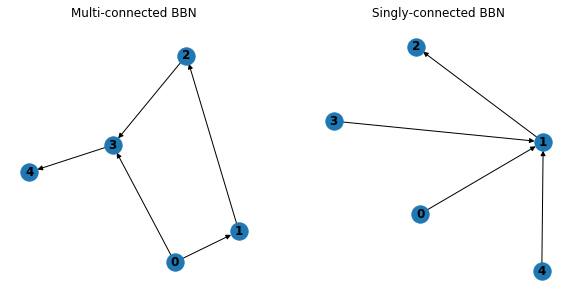

In [2]:
plt.figure(figsize=(10, 5))
plt.subplot(121) 
nx.draw(nx_multi_bbn, with_labels=True, font_weight='bold')
plt.title('Multi-connected BBN')
plt.subplot(122) 
nx.draw(nx_singly_bbn, with_labels=True, font_weight='bold')
plt.title('Singly-connected BBN')

Now, let's print out the probabilities of each node for the multi- and singly-connected BBNs.

In [3]:
join_tree = InferenceController.apply(m_bbn)
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('>')

3|3|state0,state1
3=state0|0.347556054440516
3=state1|0.6524439455594839
>
4|4|state0,state1
4=state0|0.3108587432918191
4=state1|0.6891412567081809
>
0|0|state0,state1
0=state0|0.5
0=state1|0.5
>
2|2|state0,state1
2=state0|0.5
2=state1|0.5
>
1|1|state0,state1
1=state0|0.5700711836230504
1=state1|0.4299288163769495
>


In [4]:
join_tree = InferenceController.apply(s_bbn)
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('>')

1|1|state0,state1
1=state0|0.3455923537614536
1=state1|0.6544076462385465
>
2|2|state0,state1
2=state0|0.7698307135810916
2=state1|0.23016928641890846
>
3|3|state0,state1
3=state0|0.3117227721913154
3=state1|0.6882772278086845
>
4|4|state0,state1
4=state0|0.12614472921860395
4=state1|0.873855270781396
>
0|0|state0,state1
0=state0|0.4194776243104203
0=state1|0.5805223756895798
>


# Generate a lot of graphs and visualize them

In [5]:
def generate_graphs(n=10, prog='neato', multi=True):
    d = {}
    for i in range(n):
        max_nodes = np.random.randint(3, 8)
        max_iter = np.random.randint(10, 100)
        
        if multi is True:
            g, p = generate_multi_bbn(max_nodes, max_iter=max_iter) 
        else: 
            g, p = generate_singly_bbn(max_nodes, max_iter=max_iter)
            
        bbn = convert_for_exact_inference(g, p)
        pos = nx.nx_agraph.graphviz_layout(g, prog=prog)
        
        d[i] = {
            'g': g,
            'p': p,
            'bbn': bbn,
            'pos': pos
        }
    return d

def draw_graphs(graphs, prefix):
    fig, axes = plt.subplots(5, 2, figsize=(15, 20))
    for i, ax in enumerate(np.ravel(axes)):
        graph = graphs[i]
        nx.draw(graph['g'], pos=graph['pos'], with_labels=True, ax=ax)
        ax.set_title('{} Graph {}'.format(prefix, i + 1))

multi_graphs = generate_graphs(multi=True)
singly_graphs = generate_graphs(multi=False)

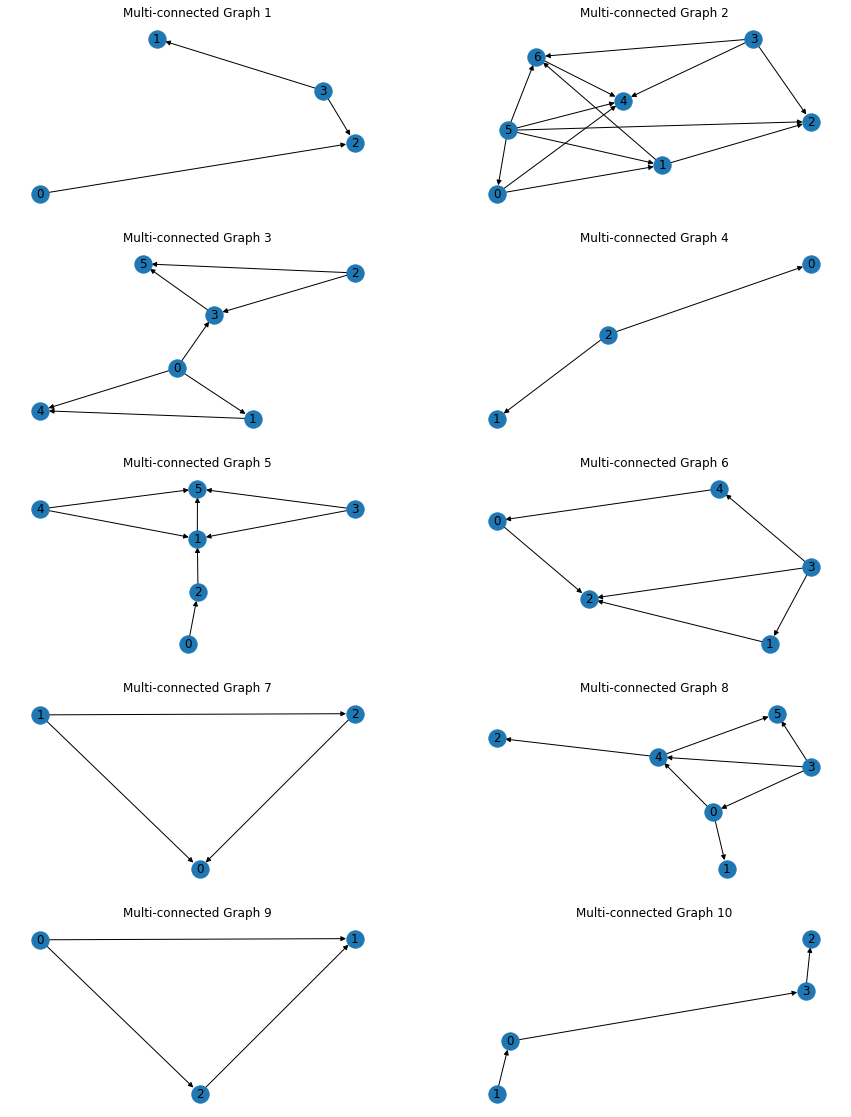

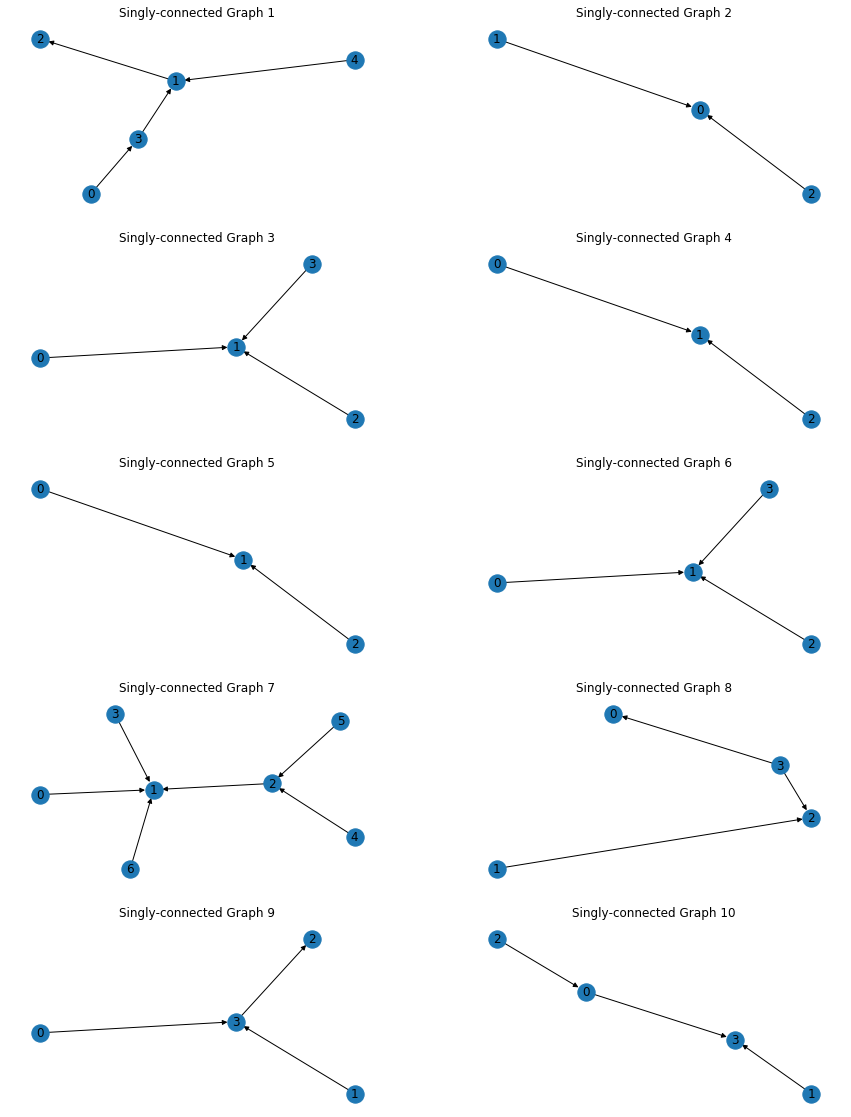

In [6]:
draw_graphs(multi_graphs, 'Multi-connected')
draw_graphs(singly_graphs, 'Singly-connected')